# Climate change in the artic

The climate is changing and this is especially noticable in the artic. Ket's explore some climate data from the capital city of Greenland, Nuuk.

In [4]:
# You may need ot install the basemap package in order to plot the map below. 
# See https://matplotlib.org/basemap/stable/users/installation.html for installation instructions.
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

First, let's plot the location of Nuuk on a map.
Below is modified from [basemap examples](https://matplotlib.org/basemap/stable/users/mapcoords.html)

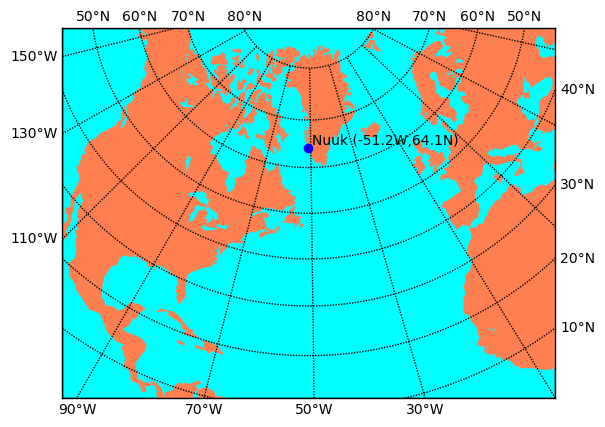

In [54]:
# setup Lambert Conformal basemap.
# lat_1 is first standard parallel.
# lat_2 is second standard parallel (defaults to lat_1).
# lon_0,lat_0 is central point.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-51.)
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua') 
# fill continents, set lake color same as ocean color. 
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
# label parallels on right and top
# meridians on bottom and left
parallels = np.arange(0.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])
# plot blue dot on Nukk, Greenland and label it as such.
lon, lat = -51.237, 64.125 # Location of Nuuk
# convert to map projection coords. 
# Note that lon,lat can be scalars, lists or numpy arrays.
xpt,ypt = m(lon,lat) 
# convert back to lat/lon
lonpt, latpt = m(xpt,ypt,inverse=True)
m.plot(xpt,ypt,'bo')  # plot a blue dot there
# put some text next to the dot, offset a little bit
# (the offset is in map projection coordinates)
plt.text(xpt+100000,ypt+100000,'Nuuk (%5.1fW,%3.1fN)' % (lonpt,latpt))
plt.show()

#### 

Let's load the data. The data comes from Mathematica's ```WeatherData``` function. From this we have data from 1942 to 2023. As with all large datasets there is some data missing. Cleaning data to remove bad points is an important first step whenever using large datasets.
In our case the years 1971 and 1972 are missing.


Here we will use the ```np.loadtxt``` function as we've seen it in the course but it also be easier to use Panda dataframes -- see https://pandas.pydata.org/docs/index.html

In [164]:
years = np.arange(1942,2024)
mask = (years < 1971) | (years > 1972)
years = years[mask]

Create arrays to hold all the data

In [193]:
num_years = len(years)
tempData = np.empty(num_years,dtype='object')

In [202]:
i = 0
for year in years:
    tempData[i] = np.loadtxt("data/MeanTemperature-Greenland-Nuuk-" + str(year) + ".dat", dtype={'names': ('date', 'temp'), 'formats': ('|S15', float)})
    i += 1

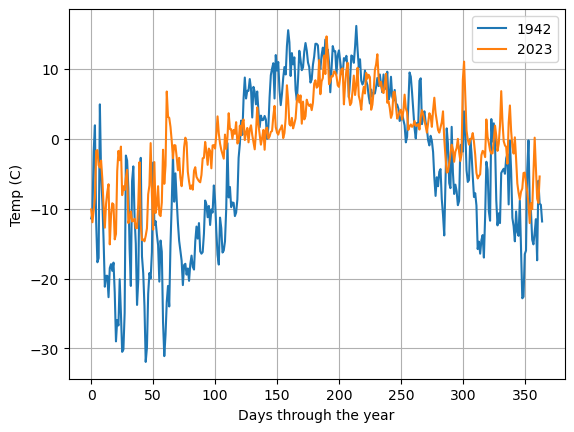

In [195]:
plt.plot(tempData[0]['temp'])
plt.plot(tempData[-1]['temp'])
plt.legend([str(years[0]), str(years[-1])])
plt.ylabel("Temp (C)")
plt.xlabel("Days through the year")
plt.grid()

Now let's compute the mean temperature for each year

In [203]:
meanTempData = np.empty(num_years)

i = 0
while i < num_years:
    meanTempData[i] = np.mean(tempData[i]['temp'])
    i += 1

Plotting the data we see a rise in the mean temperature over time, as a result of global warming

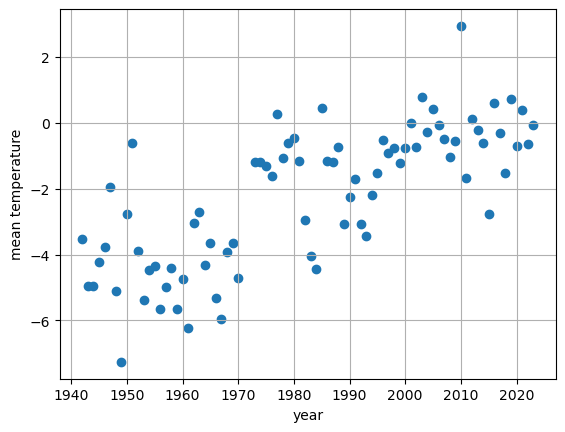

In [224]:
plt.scatter(years, meanTempData)
plt.xlabel('year')
plt.ylabel('mean temperature')
plt.grid()

Now let's fit a linear model to this. From the lecture notes on the Linear Least Squares method we have the normal equations for a linear model as:  
$$
  \begin{align*}
    m \sum x_i^2 + c \sum x_i &= \sum x_i y_i \\
    m \sum x_i + cn &= \sum y_i
  \end{align*}
$$
where $m$ and $c$ are the unknowns to be solved for and $n$ is the number of data points.

In assignment three you will be asked to write your own function to do this. Here we will use the NumPy function ```np.linalg.lstsqlstsq``` -- see https://numpy.org/doc/2.1/reference/generated/numpy.linalg.lstsq.html for an example of how to use the function

In [211]:
A = np.vstack([years, np.ones(len(years))]).T
m, c = np.linalg.lstsq(A, meanTempData)[0]
m

np.float64(0.06521099192302826)

Here $m$ measures the yearly increase the mean temperature, which we see is about 0.06C per year.

Whenever we make a fit we should compare it with the data to check it looks correct. We can also do a little extrapolation.

In [230]:
fitYears = np.arange(1942,2050)
fit = m*fitYears + c

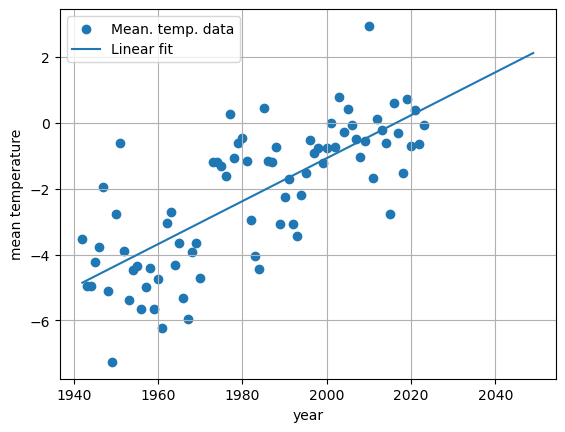

In [231]:
plt.scatter(years,meanTempData)
plt.plot(fitYears, fit)
plt.legend(['Mean. temp. data','Linear fit'])
plt.xlabel('year')
plt.ylabel('mean temperature')
plt.grid()